hpc-montecarlo

Google Cloud Datalab notebook for analysis of montecarlo stock portfolio tutorial.  See URL for detailed tutorial.  

In this notebook, we will load the simulation data from bigquery, then do some simple analysis.  The first step is to load the bigquery python package into the notebook, and then connect to bigquery to extract the aggregate portfolio data.

In [6]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [141]:
%%bigquery df
SELECT *
FROM `montecarlo_outputs.portfolio`

,f0_,f1_,f2_,f3_,f4_,f5_,f6_,f7_,f8_,f9_,...,f242_,f243_,f244_,f245_,f246_,f247_,f248_,f249_,f250_,f251_
0,2955.03,2969.054178,2958.858328,2939.327338,2962.537456,2942.212633,2994.162931,3018.529583,3064.931565,3092.980978,...,24133.565635,24318.784862,24919.937276,26080.375775,26382.108628,26951.380606,26998.276629,28013.944572,28991.776491,29398.576209
1,2955.03,2950.708205,2979.031343,2969.418372,2986.003244,3005.570277,2986.801920,2959.814956,2895.178385,2891.564475,...,21889.496871,21847.851179,22288.500800,21866.833447,22248.416493,22313.243473,22414.118274,22655.784208,22942.250565,23143.490689
2,2955.03,2969.043635,3018.477690,2985.753521,2998.672006,2992.430808,3018.022955,2994.083812,3002.362226,3029.258453,...,20459.387384,20756.460443,20388.920379,20882.875407,21087.545866,20994.435321,21579.983537,21469.772176,21261.040568,20878.099125
3,2955.03,2947.140453,2944.277831,2890.958666,2846.406022,2866.933959,2869.320890,2873.983469,2875.711859,2828.795914,...,32740.585977,33639.760415,35109.513330,36342.397107,37041.921150,37764.310496,37797.329322,38944.863008,39522.882136,38821.503869
4,2955.03,2891.032419,2913.423632,2972.159059,2949.392290,2919.901467,2911.040644,2947.047173,2982.638848,2970.722173,...,22737.369605,22749.377230,23538.875129,23503.973504,24296.342335,24745.742837,24908.674910,25604.239324,26465.510772,27863.982357
5,2955.03,2991.559142,3030.418527,2985.717138,3016.088825,3077.875612,3090.314468,3123.374138,3106.093809,3158.307304,...,16440.309950,16637.386745,16200.094632,16515.598158,17283.676334,17919.107710,18445.400496,18179.749849,18441.047543,18734.979616
6,2955.03,3002.698587,3031.495714,3045.467209,3028.297868,3043.960988,3033.042468,3089.800166,3095.863248,3105.348750,...,37254.983752,37418.720010,38003.233177,39007.272680,39059.200462,39150.395305,41452.723342,42277.343967,42026.654595,43419.094859
7,2955.03,3007.778624,3049.232520,3098.478278,3141.016604,3158.131039,3105.432431,3112.774037,3173.707333,3197.448739,...,32824.510720,33601.546549,33681.087232,33412.304895,33113.832902,33903.885223,35116.799997,35515.482774,35118.392944,35963.479792
8,2955.03,2958.650048,3005.011667,3027.995061,3086.446868,3058.800689,3116.445396,3118.975806,3097.814610,3087.013177,...,27339.640101,28310.792935,28957.630854,29748.509617,29986.588826,30157.064164,30810.625727,30364.188156,30876.465702,32586.459814
9,2955.03,2933.478718,2959.303112,3002.142338,2973.726775,2965.199904,2913.288539,2926.240242,2931.073347,3015.281702,...,25160.853322,24806.289831,25721.522007,26915.114176,27693.257681,28178.890721,29248.719346,28843.336624,29483.685998,29182.667884


Now df contains portfolio as a pandas dataframe.  Each row n represents a different simulation, and each column m represents the value of the portfolio m days into the simulation. Column 0 is the value of the portfolio before simulation, column 1 is the value after 1 day of simulation, and so on. 

We can plot the divergence of the simulations over time and see the spread.

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


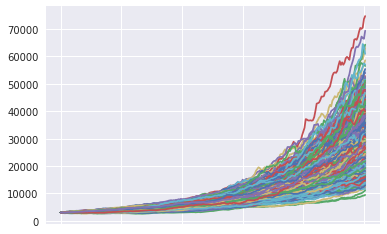

In [105]:
df.T.plot(legend=False)


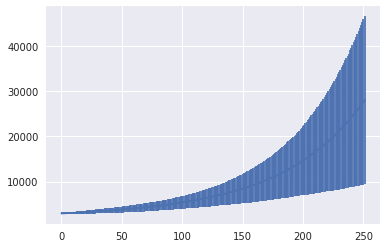

In [165]:
import matplotlib.pyplot as plt

mean = df.mean().reset_index().iloc[:,-1]
std  = df.std().reset_index().iloc[:,-1]
plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='-')
plt.show()


While this shows the general progression, we might be interested in the spread of values at the end of the simulations, day 252.  Looking at this day in particular, we plat a histogram of the values.

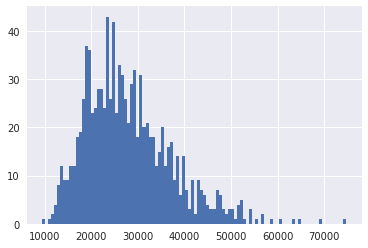

In [63]:
df.iloc[:,-1].hist(bins=100)


In [64]:
df.iloc[:,-1].describe()

count     1000.000000
mean     27958.274051
std       9295.381959
min       9446.052887
25%      21106.335794
50%      26438.180608
75%      33112.044098
max      74756.152636
Name: f251_, dtype: float64

We can also load the individual stock simulations as opposed to the aggregate portfolio valuation.  Loading the data into a second data frame, we can then take a look at each of the FANG stocks to see the progression over the 1000 simulations.

In [13]:
%%bigquery df2
SELECT *
FROM `montecarlo_outputs.vartable`

,string_field_0,int64_field_1,int64_field_2,double_field_3,double_field_4,double_field_5,double_field_6,double_field_7,double_field_8,double_field_9,...,double_field_246,double_field_247,double_field_248,double_field_249,double_field_250,double_field_251,double_field_252,double_field_253,double_field_254,double_field_255
0,FB,2410,0,152.19,144.905846,144.951172,142.749252,143.269165,142.594690,146.821937,...,89.606392,89.177785,92.721928,94.522026,91.451523,91.042981,94.177538,94.206427,91.200201,93.657338
1,FB,2410,1,152.19,152.425043,157.150582,157.506708,159.662221,161.801032,153.262579,...,60.808219,59.418792,58.933333,58.820547,57.606162,56.208928,54.603471,54.851866,53.232080,54.959868
2,FB,2410,2,152.19,151.677866,151.489566,152.819220,146.971852,148.378325,145.464370,...,196.188171,208.039583,209.094241,200.698370,203.292706,202.000613,193.434698,193.202570,189.096496,195.342309
3,FB,2410,3,152.19,150.445516,151.905515,150.441929,145.128322,149.626819,150.603106,...,83.293668,81.075901,79.486812,78.081918,79.386557,77.282347,79.287460,79.242839,79.246359,81.212200
4,FB,2410,4,152.19,145.485561,139.690635,138.331711,131.535753,129.032230,126.768496,...,51.211104,52.797385,51.371034,50.198716,49.938387,49.508197,48.624708,48.893717,48.093533,49.037524
5,FB,2410,5,152.19,150.926539,148.605474,150.917185,150.151479,149.199300,144.801924,...,69.347886,72.130507,72.205711,71.709342,73.033451,71.271345,69.843855,68.242521,67.288115,66.658413
6,FB,2410,6,152.19,145.659339,139.744537,139.062105,137.884794,141.655337,142.420351,...,82.911678,82.424948,84.519843,87.036998,86.054190,86.999170,88.731084,89.976490,88.976558,87.168492
7,FB,2410,7,152.19,149.709912,147.067371,145.081747,141.231673,138.993851,139.123350,...,177.767643,177.998859,173.648577,178.770341,174.177270,173.650900,170.394817,166.693643,172.527401,176.288891
8,FB,2410,8,152.19,158.881968,163.116787,159.661271,158.777866,164.299003,162.532402,...,118.122238,118.383675,121.651653,123.973182,126.149386,125.075431,126.814592,128.474181,126.028583,123.222751
9,FB,2410,9,152.19,147.680457,144.597714,143.011350,147.301939,146.468620,148.665525,...,77.096506,77.445335,77.671710,79.268693,78.967390,78.212094,77.827591,76.468421,77.587922,78.685890


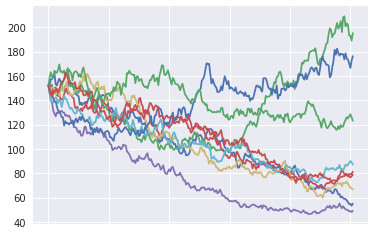

In [67]:
df2[df2.string_field_0 == 'FB'][1:10].T[3:].plot(legend=False)

In case you get a lot of font warnings for matplotlib, use this to ignore them.

In [107]:
import warnings
warnings.filterwarnings("ignore")